# PREDICTING PROJECT
## discription
in this project we will studdy the churn from our gym and find the pridiction for next month and try to find the reasons for them leaving.

## step 1
we will download libaries and data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('/datasets/gym_churn_us.csv')

## step 2
we will read and check the data and preproccess it for forther analyze

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

we can see that there are 14 columns and 4000 rows with no missing values. all the columns data type are numerical

In [4]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


in additional to the info we can say that all data is numbers or binar answers so we dont need to fix the data

In [5]:
df.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [6]:
df.duplicated().sum()

0

so we see that the data is clean with no missing values or duplicates so we can go on with the studdy

In [7]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


from the describe we see that the avg of churn is 0.2 so that means that not so mouch leave. another thing we see is the age of users is between 20-40 with a highly distribution around 29-31. half of the costumers do a one month contract, we need to try that they make longer contracts. most of costumers live near by.

In [8]:
churn=df.groupby('Churn').mean().reset_index()
churn

,Churn,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


from reading the table of comparing churn or not we can learn that the more longer the contract is and the more a costumer takes part of activities and group thing they stay longer members of the gym 

<Figure size 1800x1800 with 0 Axes>

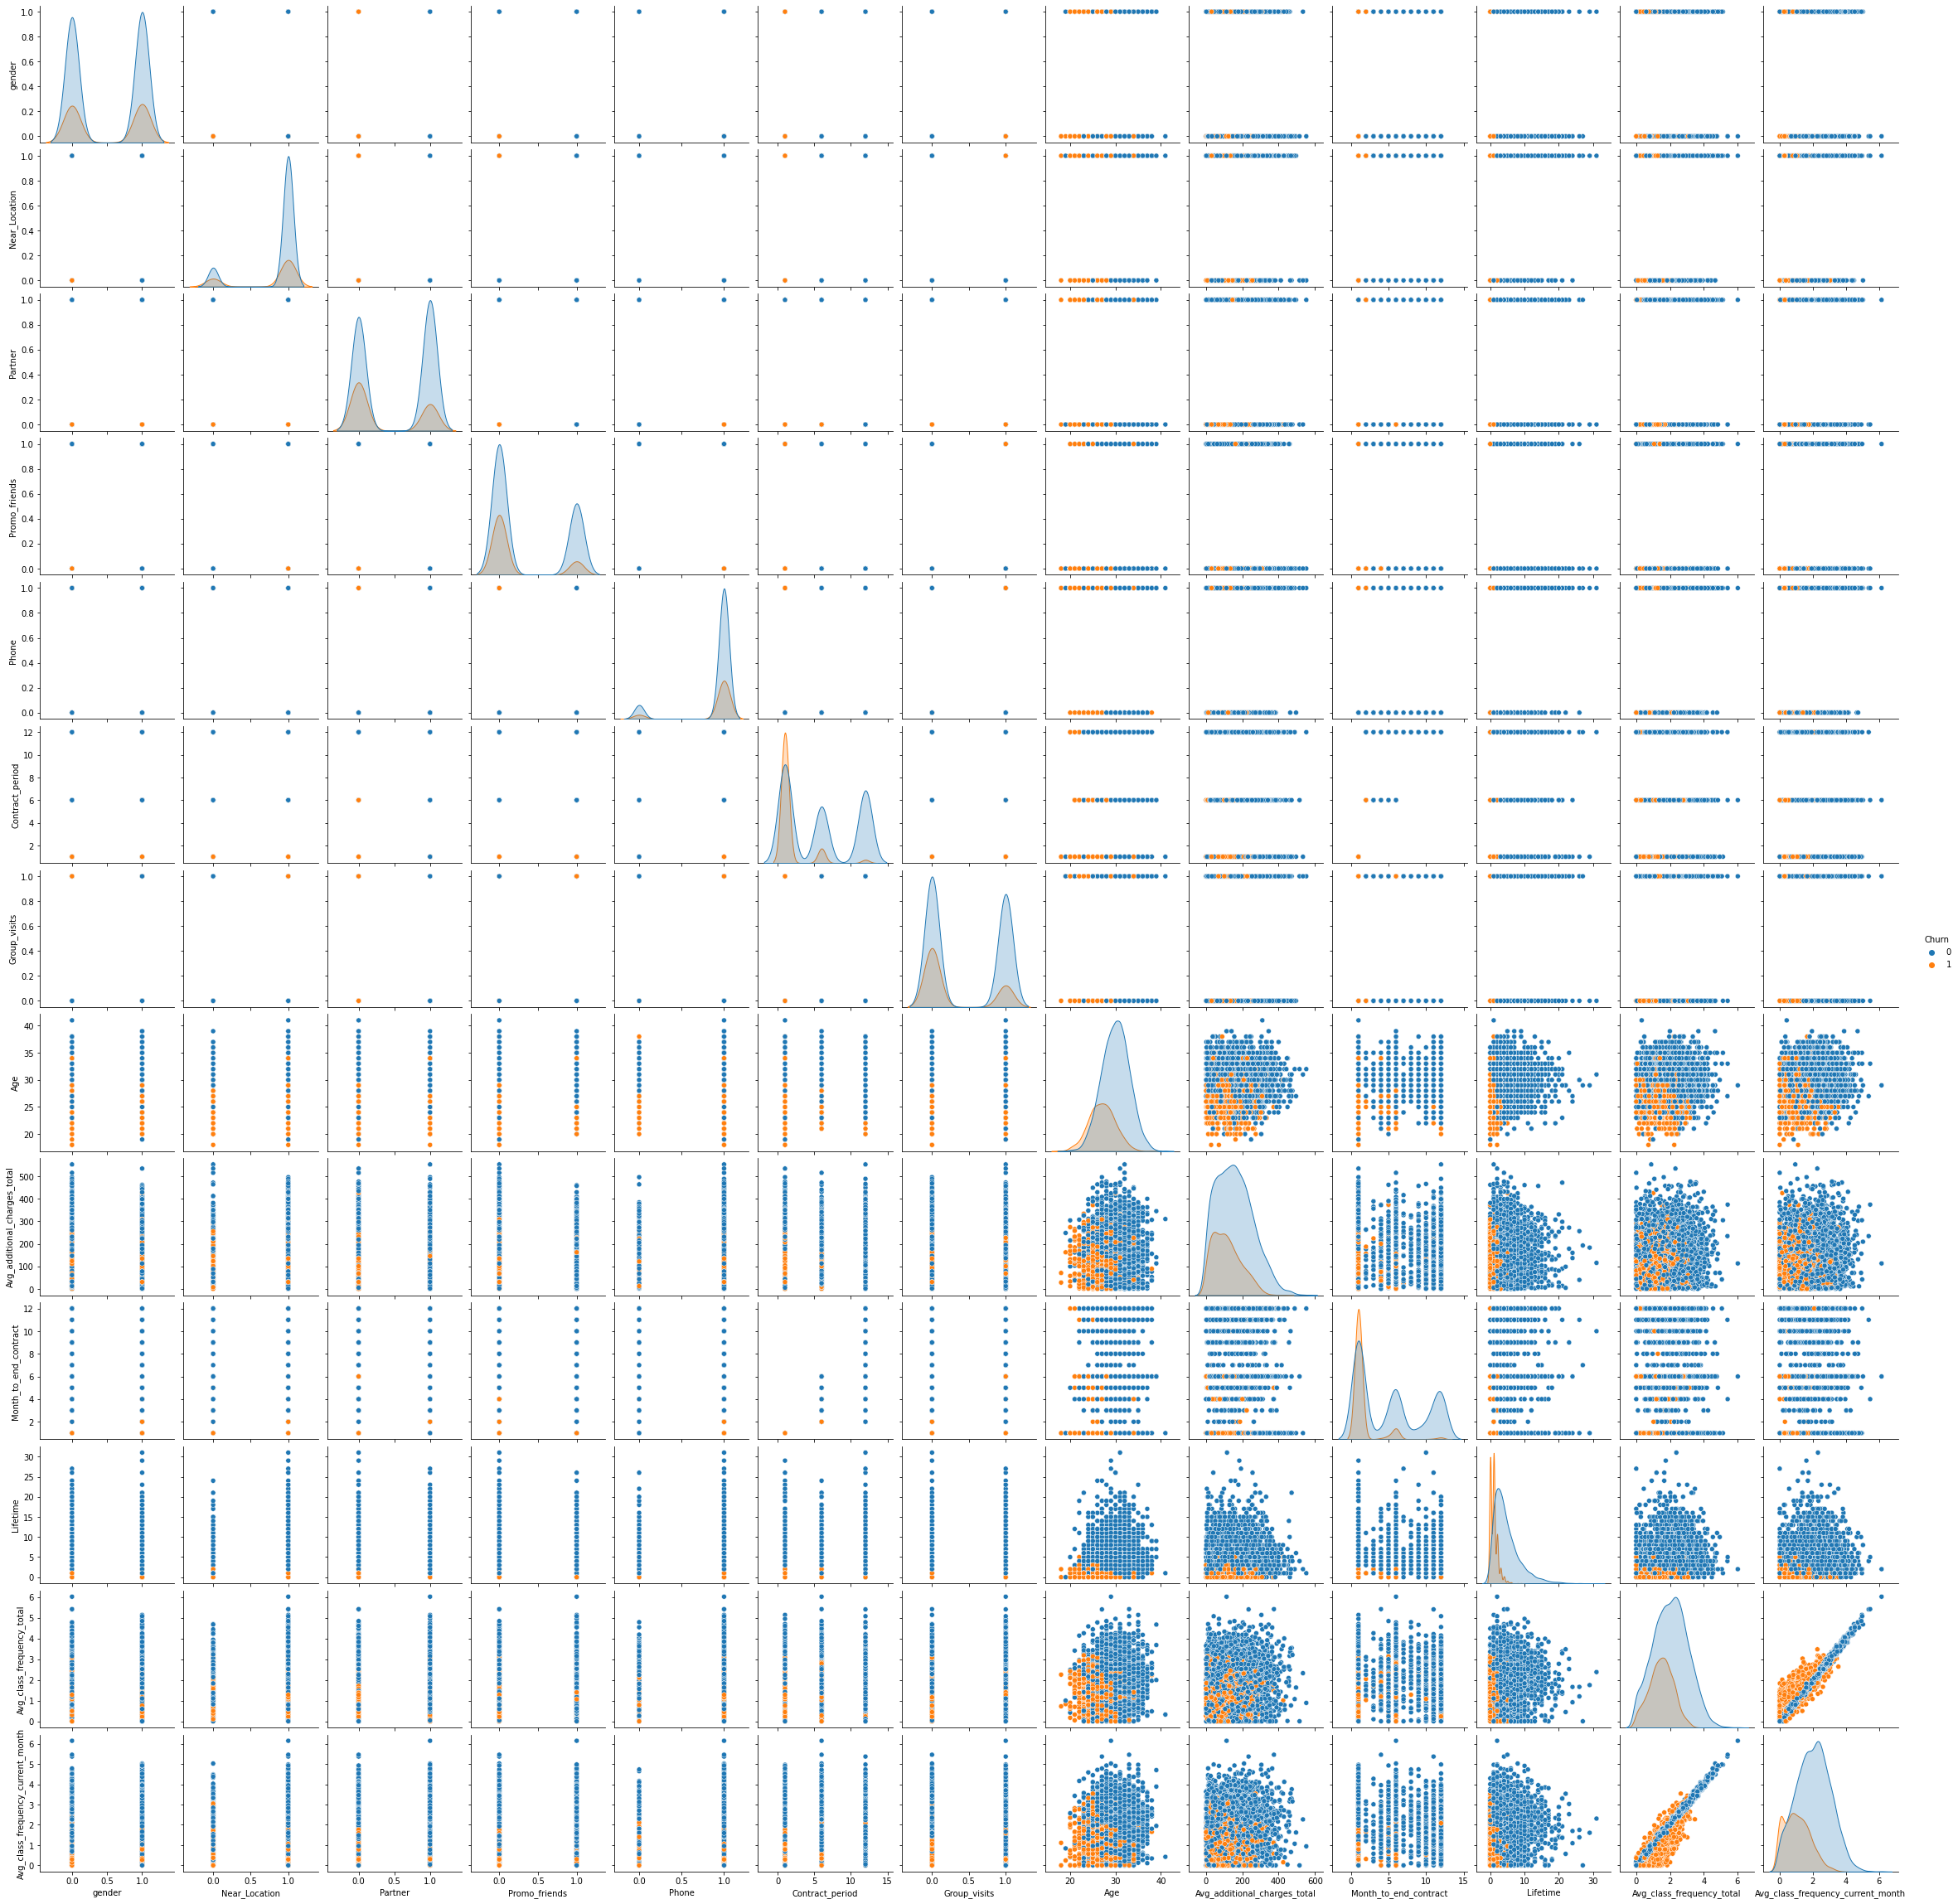

In [9]:
plt.figure(figsize=(25,25))
sns.pairplot(df, hue='Churn')
plt.show()

so now we see the distribution of churn between all featuers and we can see the there is a bigger portion to blue(didnt churn)

in more detail we can say from our data pair plot the folowing- first we define the orange as churn and blue as not churn costumers. the color that controls our graphs is the blue what means that most costumers don't leave the gym or not so fast. the avrage churn is about 25% or a beat more but definitely not more then 50% (we can see that from the describe table that 50% is 0 meaning no churn and in 75% we see 1 that means churn). we see that age is about the same distribution (only a year or 2 diffrence in avrage) and gender is devided about the same. we for sure can say that how takes more part in social things like brinning a friend or participates in group activities has a bigger chance to stay and or spend more money(does spending extra is becouse i stay or the reason i stay)

In [10]:
dfc=df.corr()
dfc


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


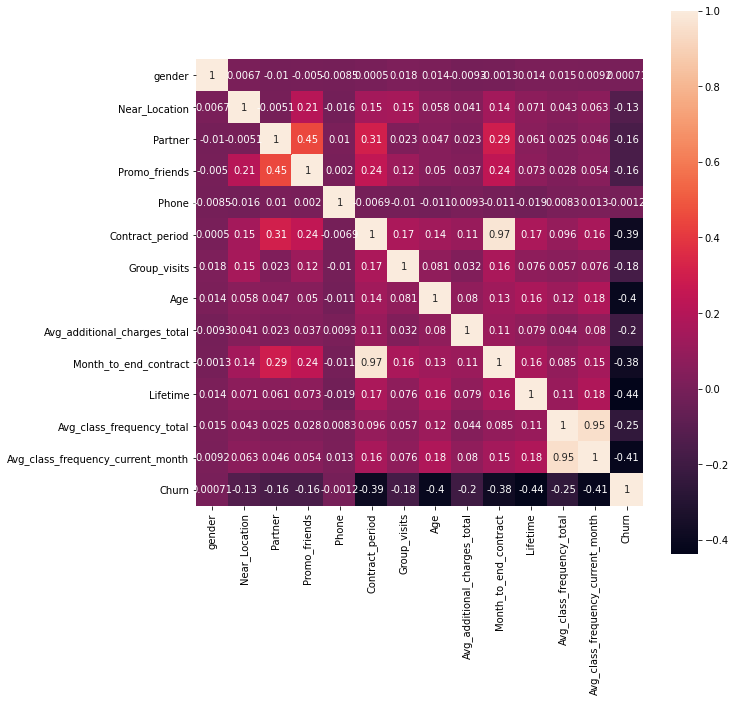

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(dfc, annot=True,square=True)

plt.show()

the heatmap tells us that the corralation between most features is very low and there is a very small conection between features but there is some corralation(negetive) between churn and a few features like the contract period, age, life time and the frequency of classes. this information is telling the same story as the previous graphs and makes the connection with the churn more clearly 

## step 3- Build a model to predict user churn
we now will start to build a model to predict the next month churn. we will start with spliting the data and training it in two models- logistic regresion and random forest

defining and spliting the data for model

In [12]:
X= df.drop('Churn', axis=1)
y= df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

standerizing the data

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

trainning the data

In [14]:
X_train_st=scaler.transform(X_train)
X_test_st=scaler.transform(X_test)

In [15]:
model1=LogisticRegression(random_state=0)

model1.fit(X_train_st, y_train)

LogisticRegression(random_state=0)

making prdiction and printing the result

we defining a function for calculating and printing the metrics we want to check in the model

In [16]:
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    

In [17]:
m1_predictions = model1.predict(X_test_st)
m1_probabilities = model1.predict_proba(X_test_st)[:,1]


In [18]:
print_all_metrics(y_test, m1_predictions, m1_probabilities, title='Metrics for logistic regression:' )

Metrics for logistic regression:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83


this is the logistic tree, now lets do the same for the random forest

In [19]:
model2= RandomForestClassifier(n_estimators = 100, random_state=0)

In [20]:
model2.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [21]:
m2_predictions = model2.predict(X_test)
m2_probabilities = model2.predict_proba(X_test)[:,1]

In [22]:
print_all_metrics(y_test,m2_predictions, m2_probabilities, title = 'Metrics for random forest:')

Metrics for random forest:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82


we see that both models are pretty the same with a beat better grade in logistic tree

In [23]:
importances = model2.feature_importances_

In [24]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]

In [25]:
std = np.std([tree.feature_importances_ for tree in model2.estimators_], axis=0)

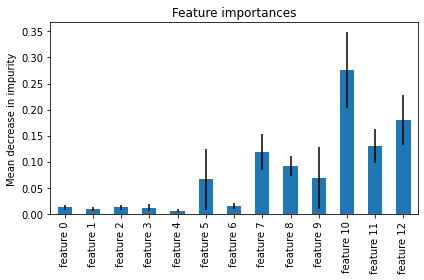

In [26]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

from this up comming graph we can see that feature 10 is the most importaint high more then 12 and 11. if the feature numbers are one to one to our dataset columns the most imortaint feature is the costumers life time

<div class="alert alert-block alert-success">
<b>Reviewer's comment. V.2.</b> <a class="tocSkip"></a>
    
Yep! It would be more informative to add features name. :) 
</div>

## Step 4- Creating user clusters 

we standerized the all x and cluster with the k-means

In [27]:
scaler = StandardScaler()
scaler.fit(X)
X_sc=scaler.transform(X)

In [28]:
linked = linkage(X_sc, method = 'ward') 

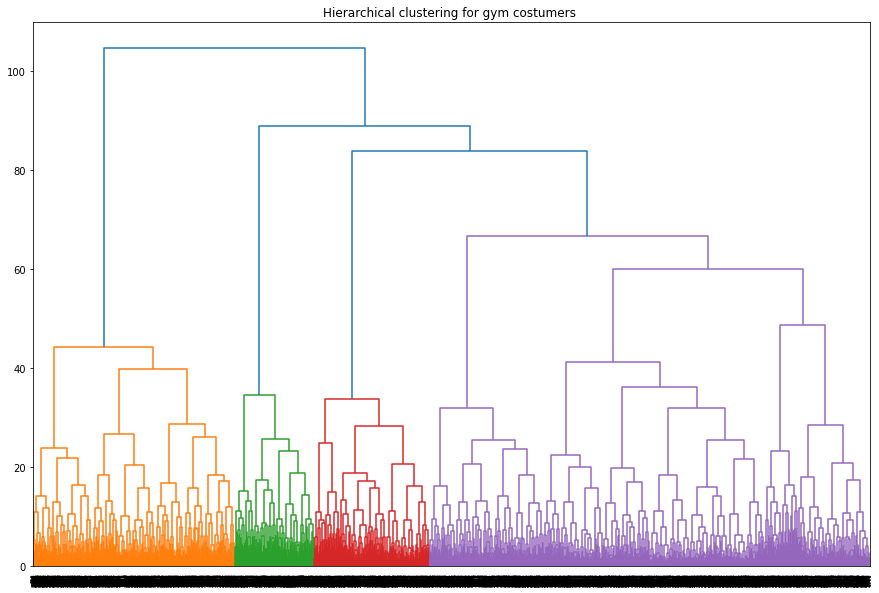

In [29]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for gym costumers ')
plt.show()

from the dendorgram we see we have 5 clusters. let's train it on KMeans

In [30]:
dkm=KMeans(n_clusters=5)
labels = dkm.fit_predict(X_sc)

now we trained the kmeans we will add them to our data frame and check their mean

In [31]:
df['cluster']= labels
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,2
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,4
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,4
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,1


In [32]:
cldf=df.groupby('cluster').mean()
cldf

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
0,0.485738,0.718011,0.299919,0.018745,1.0,1.914425,0.276284,28.083945,129.496414,1.821516,2.195599,1.225192,0.967967,0.572942
1,0.501582,0.949367,0.829114,0.998418,1.0,3.083861,0.447785,29.118671,141.840116,2.884494,3.770570,1.769836,1.668512,0.246835
2,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
3,0.554054,0.850225,0.262387,0.052928,1.0,2.595721,0.436937,30.013514,159.788148,2.417793,4.781532,2.745529,2.733295,0.090090
4,0.500577,0.936563,0.738178,0.478662,1.0,11.854671,0.546713,29.889273,163.418253,10.798155,4.677047,2.007471,1.999303,0.021915


we see from our avg cluster group that cluster 2 are the costumers how live the farest away from the gym and have the most high avg of churn and their the youngest group age and they have the smalest contract lifetime, to make it more understood let visual it for every feature

In [33]:
bin_col = []
mul_col = []
for col in df.columns:
    if df[col].nunique() == 2:
        bin_col.append(col)
    else:
        mul_col.append(col)

> Gender:


,0,1,2,3,4
Cluster,0.000000,1.000000,2.000000,3.000000,4.000000
Mean,0.485738,0.501582,0.523316,0.554054,0.500577


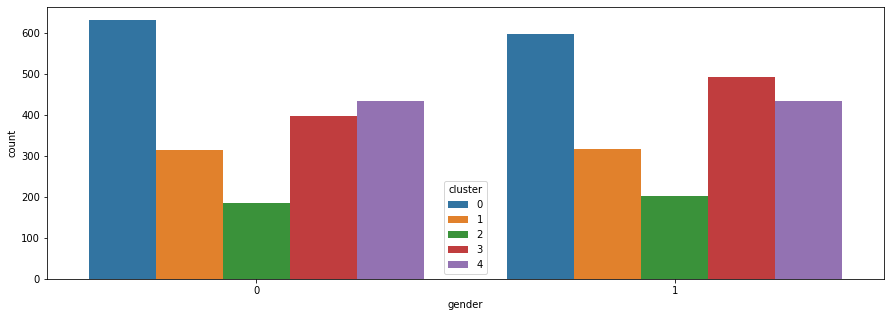

> Near_location:


,0,1,2,3,4
Cluster,0.000000,1.000000,2.000000,3.000000,4.000000
Mean,0.718011,0.949367,0.862694,0.850225,0.936563


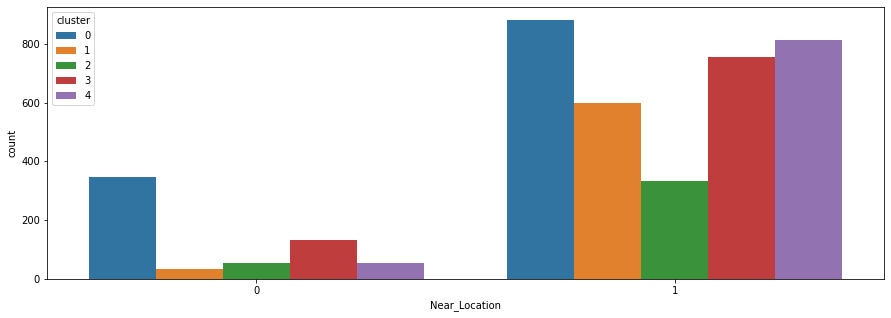

> Partner:


,0,1,2,3,4
Cluster,0.000000,1.000000,2.000000,3.000000,4.000000
Mean,0.299919,0.829114,0.471503,0.262387,0.738178


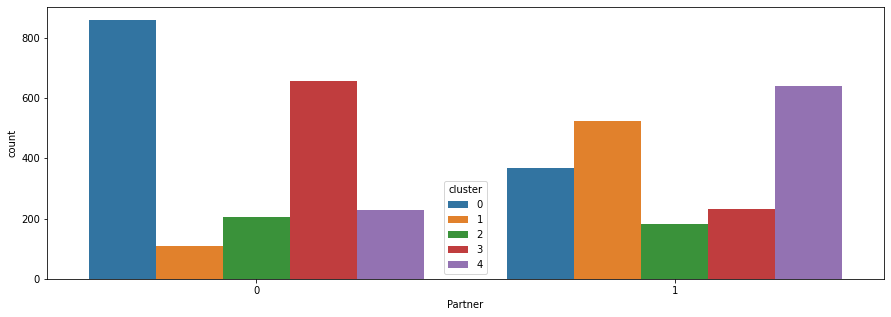

> Promo_friends:


,0,1,2,3,4
Cluster,0.000000,1.000000,2.000000,3.000000,4.000000
Mean,0.018745,0.998418,0.305699,0.052928,0.478662


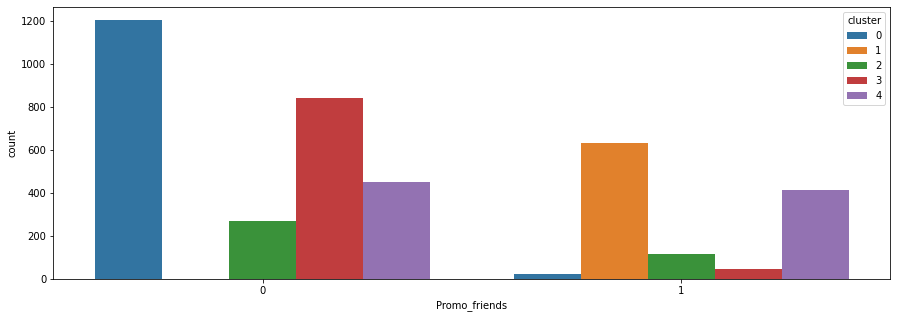

> Phone:


,0,1,2,3,4
Cluster,0.0,1.0,2.0,3.0,4.0
Mean,1.0,1.0,0.0,1.0,1.0


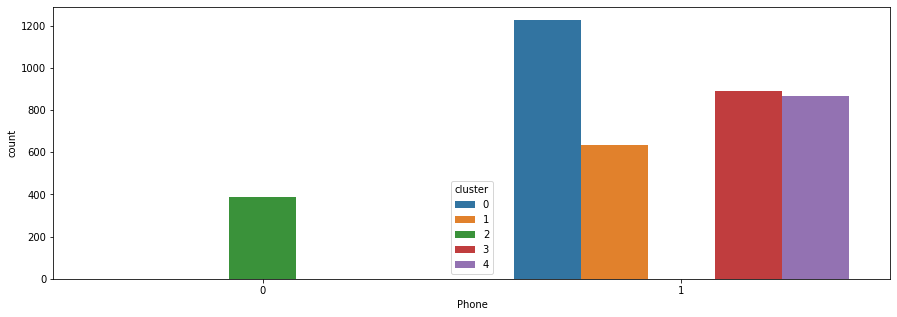

> Contract_period:


,0,1,2,3,4
Cluster,0.000000,1.000000,2.000000,3.000000,4.000000
Mean,1.914425,3.083861,4.777202,2.595721,11.854671


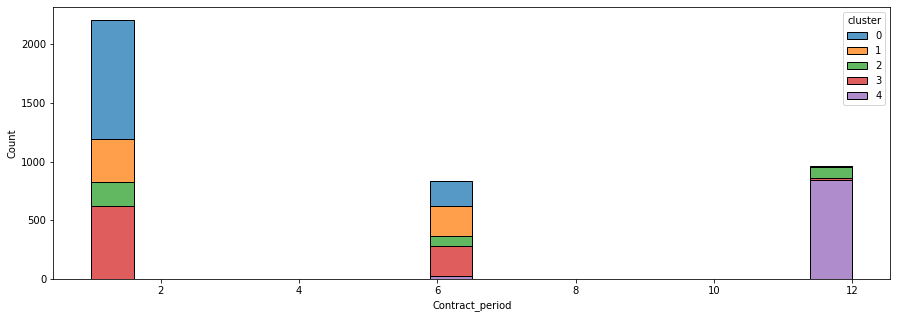

> Group_visits:


,0,1,2,3,4
Cluster,0.000000,1.000000,2.000000,3.000000,4.000000
Mean,0.276284,0.447785,0.427461,0.436937,0.546713


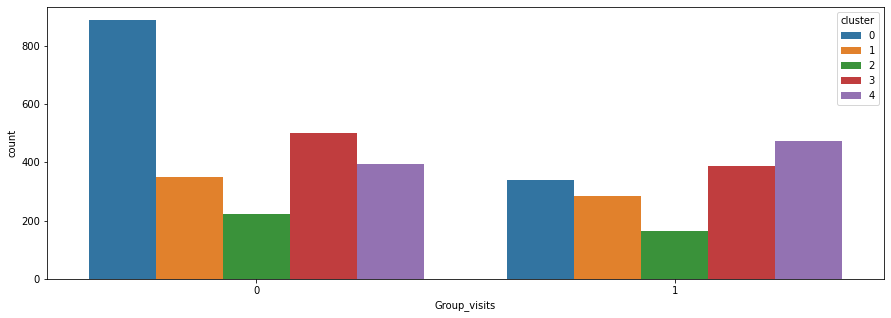

> Age:


,0,1,2,3,4
Cluster,0.000000,1.000000,2.000000,3.000000,4.000000
Mean,28.083945,29.118671,29.297927,30.013514,29.889273


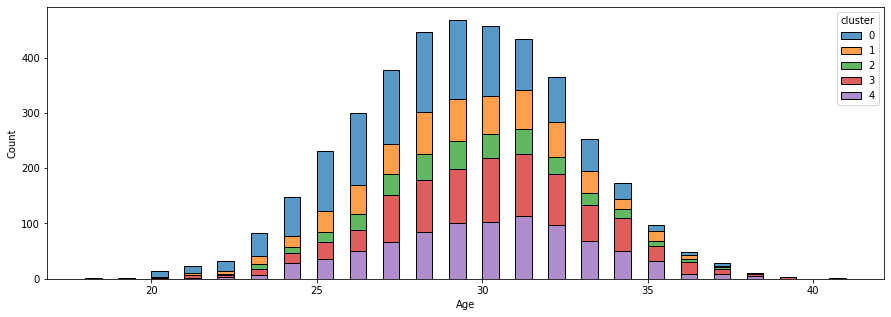

> Avg_additional_charges_total:


,0,1,2,3,4
Cluster,0.000000,1.000000,2.000000,3.000000,4.000000
Mean,129.496414,141.840116,144.208179,159.788148,163.418253


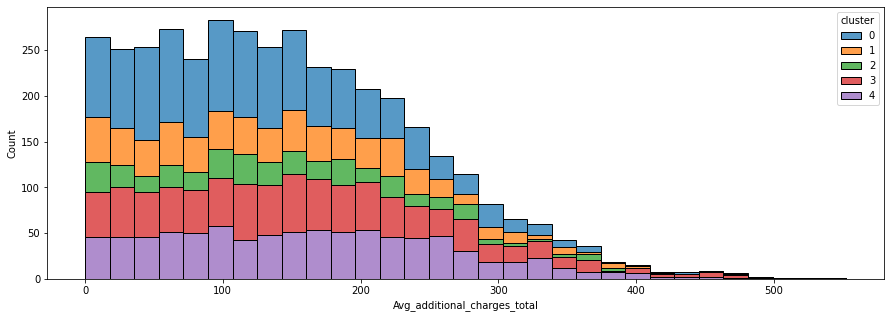

> Month_to_end_contract:


,0,1,2,3,4
Cluster,0.000000,1.000000,2.000000,3.000000,4.000000
Mean,1.821516,2.884494,4.466321,2.417793,10.798155


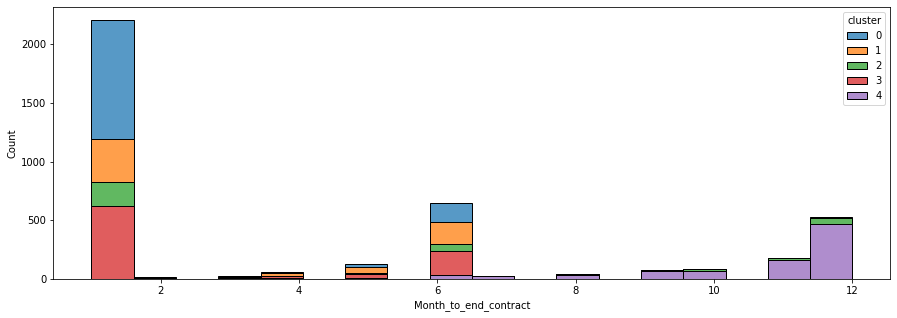

> Lifetime:


,0,1,2,3,4
Cluster,0.000000,1.00000,2.000000,3.000000,4.000000
Mean,2.195599,3.77057,3.940415,4.781532,4.677047


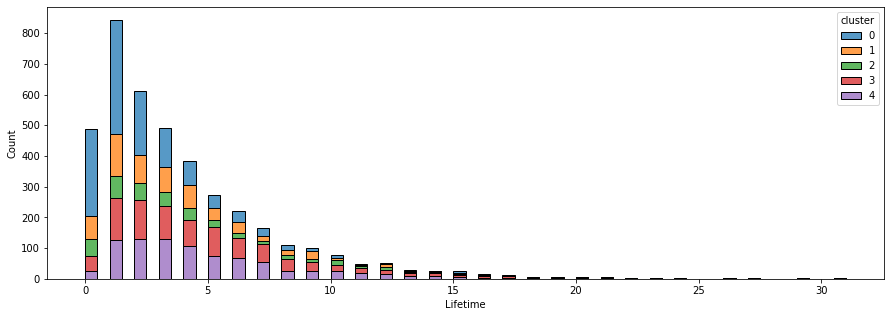

> Avg_class_frequency_total:


,0,1,2,3,4
Cluster,0.000000,1.000000,2.000000,3.000000,4.000000
Mean,1.225192,1.769836,1.854211,2.745529,2.007471


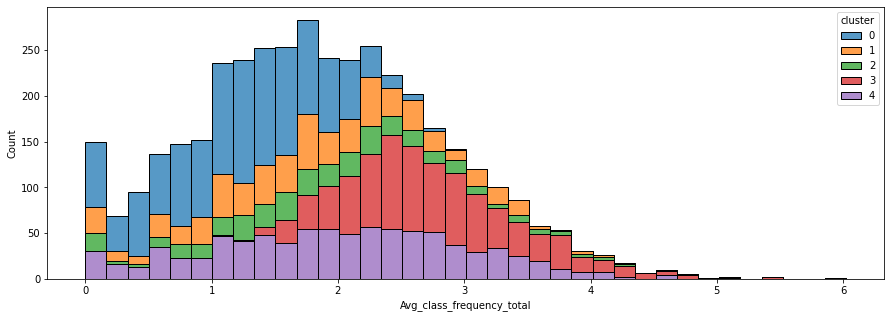

> Avg_class_frequency_current_month:


,0,1,2,3,4
Cluster,0.000000,1.000000,2.000000,3.000000,4.000000
Mean,0.967967,1.668512,1.723967,2.733295,1.999303


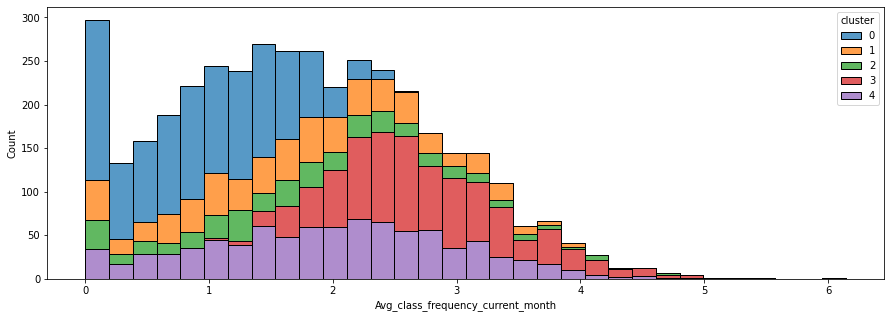

> Churn:


,0,1,2,3,4
Cluster,0.000000,1.000000,2.000000,3.00000,4.000000
Mean,0.572942,0.246835,0.266839,0.09009,0.021915


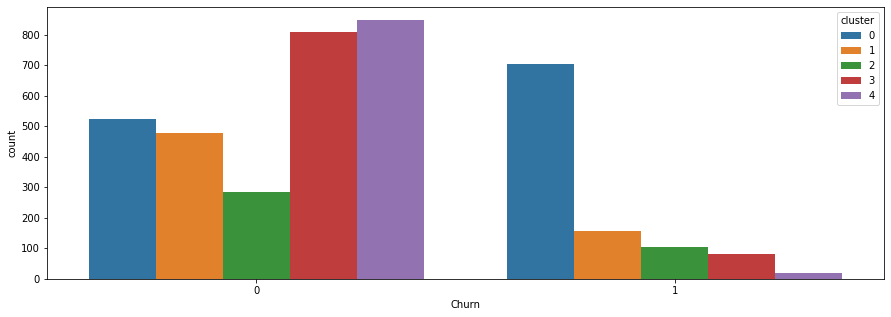

In [34]:
for i in df.drop('cluster',axis=1).columns.to_list():
    print('>\033[1m {:}:\033[0m'.format(i.capitalize()))
    plt.figure(figsize=(15,5))
    display(cldf[i].reset_index().rename(columns={'cluster':'Cluster',i:'Mean'}).T)
    if i in mul_col:
        sns.histplot(data=df, x=i, hue='cluster',multiple="stack", palette='tab10')
    if i in bin_col or i=='churn':
        sns.countplot(data=df, x=i, hue='cluster', palette='tab10')
        plt.xticks((0,1))
    plt.show()

In [35]:
ccldf=df.groupby(['cluster','Churn']).mean()
ccldf


gender  Near_Location   Partner  Promo_friends  Phone  \
cluster Churn                                                            
0       0      0.467557       0.736641  0.349237       0.013359    1.0   
        1      0.499289       0.704125  0.263158       0.022760    1.0   
1       0      0.502101       0.945378  0.840336       0.997899    1.0   
        1      0.500000       0.961538  0.794872       1.000000    1.0   
2       0      0.522968       0.886926  0.501767       0.360424    0.0   
        1      0.524272       0.796117  0.388350       0.155340    0.0   
3       0      0.549505       0.846535  0.271040       0.058168    1.0   
        1      0.600000       0.887500  0.175000       0.000000    1.0   
4       0      0.498821       0.937500  0.738208       0.481132    1.0   
        1      0.578947       0.894737  0.736842       0.368421    1.0   

               Contract_period  Group_visits        Age  \
cluster Churn                                             
0       0             2.555344      0.347328  29.700382   
        1             1.436700      0.223329  26.879090   
1       0             3.493697      0.483193  29.850840   
        1             1.833333      0.339744  26.884615   
2       0             5.862191      0.462898  30.081272   
        1             1.796117      0.330097  27.145631   
3       0             2.698020      0.436881  30.202970   
        1             1.562500      0.437500  28.100000   
4       0            11.851415      0.551887  29.966981   
        1            12.000000      0.315789  26.421053   

               Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
cluster Churn                                                                  
0       0                        150.029696               2.404580  3.793893   
        1                        114.191379               1.386913  1.004267   
1       0                        149.205550               3.247899  4.705882   
        1                        119.366101               1.775641  0.916667   
2       0                        157.052061               5.452297  5.028269   
        1                        108.918677               1.757282  0.951456   
3       0                        163.380111               2.506188  5.150990   
        1                        123.509316               1.525000  1.050000   
4       0                        164.596332              10.793632  4.758255   
        1                        110.838708              11.000000  1.052632   

               Avg_class_frequency_total  Avg_class_frequency_current_month  
cluster Churn                                                                
0       0                       1.070694                           1.071644  
        1                       1.340351                           0.890688  
1       0                       1.868939                           1.869069  
        1                       1.467442                           1.056556  
2       0                       1.967847                           1.967374  
        1                       1.541987                           1.055188  
3       0                       2.765330                           2.772844  
        1                       2.545541                           2.333851  
4       0                       2.015523                           2.018280  
        1                       1.648089                           1.152315

we learn from this table that the biggest churn is cluster 2 that here is row 4 and we see that the young group that dosent take part in activities and dosent spends money has the more chance to leave the gym for good

## step 5- conclusions and recomendations

in the beggining we downloaded our data set and preprocess it for analyzing. then we studdied the distribution and corrolation between features and then we looked for the best model and metrix to predict the churn from our gym. finally we made clusters of costumers and found 5 clusters.
in the 5 clusters we found the best cluster is cluster 0 becuase there the less to churn the gym and they take part with the activities the gym gives, they bring there friends and add extra money the second to come is cluster 2. the worst clustaer is cluster 4 because they are the lowest in any parameter but the most critical cluster to dill with is 2 since there the biggest churn group and that means we loss for that money

we learn from the analyze that costumers that buy short term contracts have higher chances to leave as there contract is finish so here are a few recomendations:
1) try to sell longer contracts to new costoumers
2) the older the costumer is the less chance they leave so aim to older age group or find a way for younger age to stay
3) make group activities more atractive, the more a costumer takes part in group activities the longer they stay in the gym
4) make a friend brings a friend discount for long term contracts

if we begin with this we can get less churn and grow our costumers 